In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os # for file editing
import shutil # for console commands
#print(os.listdir("../input"))

In [2]:
!pip install pandas

    100% |████████████████████████████████| 10.1MB 176kB/s ta 0:00:011   55% |█████████████████▋              | 5.6MB 5.9MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/4f/a4/879454d49688e2fad93e59d7d4efda580b783c745fd2ec2a3adf87b0808d/pytz-2020.1-py2.py3-none-any.whl


In [4]:
#function for downloading from URL 
# if you are using Kaggle, make sure to turn on internet connection and GPU
import tarfile
import urllib
# this snippet of code is modified for our use case with additional comments, original source code:
# https://github.com/tflearn/tflearn/blob/master/tflearn/datasets/cifar10.py
def download(filename, source_url, work_directory):
    if not os.path.exists(work_directory): #check if the folder exists; if not make dir
        os.mkdir(work_directory)
    filepath = os.path.join(work_directory, filename)
    if not os.path.exists(filepath): # check if file exists; if not, download
        print("Downloading file, Please wait...")
        filepath, _ = urllib.request.urlretrieve(source_url + filename, # this is a function to download files
                                                 filepath)
        statinfo = os.stat(filepath)
        print(('Succesfully downloaded', filename, statinfo.st_size, 'bytes.'))
        untar(filepath,work_directory)
    return filepath

In [5]:
#only extract jpg files
def jpg_files(members):
    for tarinfo in members:
        if os.path.splitext(tarinfo.name)[1] == ".jpg":
            yield tarinfo

In [6]:
# extract function
def untar(fname,path="17category-flowers-py"): #untarring the archive
    tar = tarfile.open(fname)
    tar.extractall(path="17category-flowers-py", members=jpg_files(tar))
    tar.close()
    if path is "":
        print("File Extracted in Current Directory")
    else:
        print("File Extracted in to ",  path)

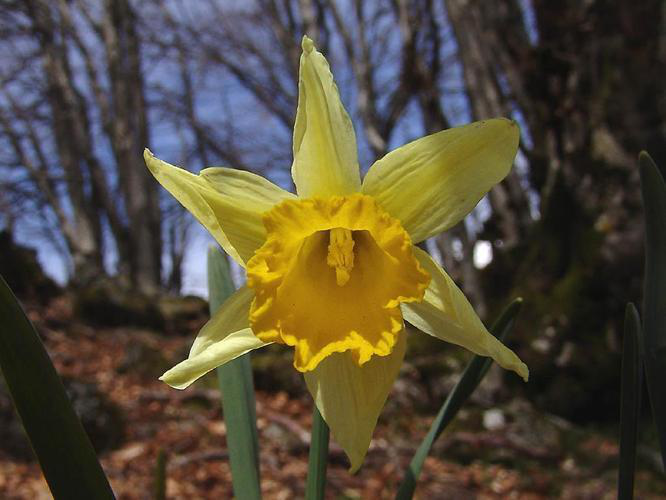

In [15]:
from PIL import Image #show one example of image
Image.open("jpg/train/0/image_0002.jpg")

In [21]:
!pip install -U scikit-learn scipy matplotlib

  Cache entry deserialization failed, entry ignored
    100% |████████████████████████████████| 6.9MB 258kB/s ta 0:00:011
    100% |████████████████████████████████| 25.9MB 66kB/s eta 0:00:011
  Cache entry deserialization failed, entry ignored
    100% |████████████████████████████████| 12.4MB 146kB/s ta 0:00:011
    100% |████████████████████████████████| 307kB 4.0MB/s eta 0:00:01
    100% |████████████████████████████████| 13.5MB 137kB/s ta 0:00:011
  Cache entry deserialization failed, entry ignored
  Using cached https://files.pythonhosted.org/packages/f7/d2/e07d3ebb2bd7af696440ce7e754c59dd546ffe1bbe732c8ab68b9c834e61/cycler-0.10.0-py2.py3-none-any.whl
Requirement already up-to-date: python-dateutil>=2.1 in /home/ai-students/newfairseq/lib/python3.6/site-packages (from matplotlib)
Requirement already up-to-date: pyparsing!=2.0.4,!=2.1.2,!=2.1.6,>=2.0.1 in /home/ai-students/newfairseq/lib/python3.6/site-packages (from matplotlib)
  Cache entry deserialization failed, entry ignored


In [14]:
!ls

 jpg   'jpg (copy)'     preprocess.ipynb   train_preprocess.py
 jpg2   make_train.py   split_jpg.py	   train_split.py


In [16]:
#load images as np arrays
def load_data(fpath):    
    img=Image.open(fpath).resize((224,224)) # resize to 224x224 for training purposes
    img = np.asarray(img, dtype='float32')
    return img

In [18]:
#all images are loaded as np arrays
images=[]
labels=[]
total=1361
j=1
for i in range(1, total): 
    fname="jpg2/image_"    
    fpath = os.path.join(fname + str(i).zfill(4) + ".jpg")
    images.append(load_data(fpath))
    labels.append(j) #labels are created as well
    if i%80==0: j+=1


In [19]:
images = np.asarray(images) # all of the images are converted to np array of (1360,224,224,3)
labels = np.asarray(labels).reshape(1360,1) # labels are also converted to (1360,1)
images.shape

(1360, 224, 224, 3)

In [22]:
# split data into training and test
from sklearn.model_selection import train_test_split 
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, train_size = 0.8, random_state =  104)

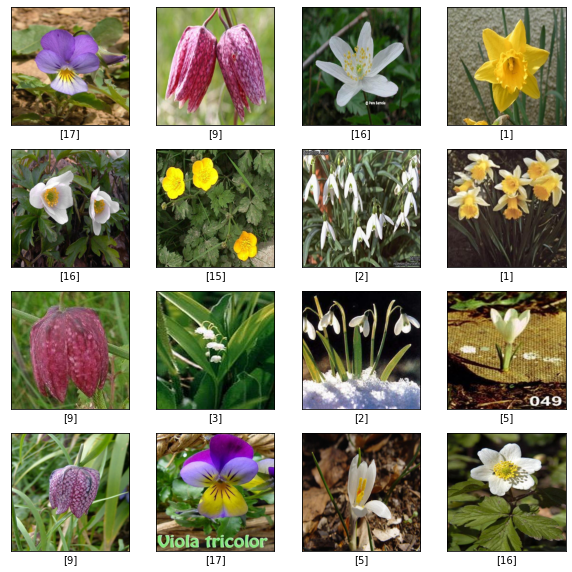

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10)) # plot 25 images
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i]/255, cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])

In [27]:
# dividing images into train and test folders by creating images from arrays
import cv2
import numpy as np
def create_images(data, labels, folder):
    dirname=folder
    
    if not os.path.exists(dirname): #check if the folder exists; if not make dir
      os.mkdir(dirname)
    n=0
    
    for i in data:
      label_n=labels[n][0]
      subfolder = folder + "/" + str(label_n) 
      if not os.path.exists(subfolder): # create subfolders with categories
          os.mkdir(subfolder)  
      filepath =  subfolder + "/" + str(n)+ ".jpg"
      cv2.imwrite(filepath, data[n]) #save image to corresponding subfolders
      n+=1

In [28]:
create_images(train_images, train_labels, 'train') #save image to corresponding subfolders
create_images(test_images, test_labels, 'test')

In [29]:
train_dir =os.path.realpath('train')
validation_dir = os.path.realpath('test')
image_size = 224

In [48]:
train_dir

'/home/ai-students/Downloads/genie_2ndround/17flowers/train'

In [41]:
# use vgg16 pre-trained model with trainable densely connected output layer

from keras.applications import VGG16
#Load the VGG model
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))

# Freeze all the layers except for the last layer: 
for layer in vgg_conv.layers[:-4]:
    layer.trainable = False
 
from keras import models
from keras import layers
from keras import optimizers
 
# Create the model
model = models.Sequential()
 
# Add the vgg convolutional base model
model.add(vgg_conv)
 
# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(17, activation='softmax'))
model.summary() 


Using TensorFlow backend.


58892288/58889256 [==============================] - 22s 0us/step
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              25691136  
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 17)                17425     
Total params: 40,423,249
Trainable params: 32,787,985
Non-trainable params: 7,635,264
_________________________________________________________________


Here we can see we are oversimply things. We are taking the weights from the last layer and then we would flatten the layers to use the weights. Then, we would take 2 dense layers to learn all the connections between them.

This would increase the trainable parameters. Dense_1 would take 25088*1024 = 25691136 parameters
Dense_2 would take 1024*17 = 17425 parameters


In [34]:
!git clone https://github.com/Hvass-Labs/TensorFlow-Tutorials.git


Cloning into 'TensorFlow-Tutorials'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 506 (delta 1), reused 14 (delta 1), pack-reused 480
Receiving objects: 100% (506/506), 76.90 MiB | 7.06 MiB/s, done.
Resolving deltas: 100% (228/228), done.


## without using the augmentation and seeing the results 

In [49]:
# image augmentation for train set and image resizing for validation
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator( # this function will generate augmented images in real time. This time only rescaling
      rescale=1./255)
 
validation_datagen = ImageDataGenerator(rescale=1./255) # for validation we don't need to augment

train_batchsize = 100
val_batchsize = 10
 
train_generator = train_datagen.flow_from_directory( # this function takes images from folders and feeds to Imagedatagenerator
        train_dir,
        target_size=(image_size, image_size),
        batch_size=train_batchsize,
        class_mode='categorical')
 
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(image_size, image_size),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)

Found 1088 images belonging to 17 classes.
Found 272 images belonging to 17 classes.


#### Here, we would be rescaling both the training and validation images. Rescaling is an important step and is normally done before any preprocessing happens. The original images consist in RGB coefficients in the 0-255, but such values would be too high for our model to process (given a typical learning rate), so we target values between 0 and 1 instead by scaling with a 1/255. factor

In [50]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-4), # learning rate should be small
              metrics=['acc', 'top_k_categorical_accuracy'])

Learning rate selection is very important. It should be small so that the weights learnt from previous layers dont change so much. We dont want to jump too much from the stable weights provided from the VGG layers.

In [51]:
# train the model without augmented images 
# Gpu is necessary
history = model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=0)

In [52]:
print('training acc.:',history.history['acc'][-1],'\n','test acc.:', (history.history['val_acc'])[-1])

training acc.: 1.0 
 test acc.: 0.9522058963775635


In [53]:
print(' training top 5:',history.history['top_k_categorical_accuracy'][-1], '\n',
      'val top 5:', history.history['val_top_k_categorical_accuracy'][-1], '\n')

 training top 5: 1.0 
 val top 5: 0.9963235259056091 



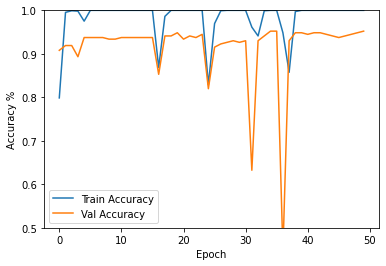

In [55]:
#plot the accuracy history
import matplotlib.pyplot as plt
def plot_history(history):
 plt.figure()
 plt.xlabel('Epoch')
 plt.ylabel('Accuracy %')
 plt.plot(history.epoch, np.array(history.history['acc']),
 label='Train Accuracy')
 plt.plot(history.epoch, np.array(history.history['val_acc']),
 label = 'Val Accuracy')
 plt.legend()
 plt.ylim([0.5, 1])
plot_history(history)

here is with all the data augmentation

In [42]:
# image augmentation for train set and image resizing for validation
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator( # this function will generate augmented images in real time like rotation, flip and shift
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
 
validation_datagen = ImageDataGenerator(rescale=1./255) # for validation we don't need to augment

train_batchsize = 100
val_batchsize = 10
 
train_generator = train_datagen.flow_from_directory( # this function takes images from folders and feeds to Imagedatagenerator
        train_dir,
        target_size=(image_size, image_size),
        batch_size=train_batchsize,
        class_mode='categorical')
 
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(image_size, image_size),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)

Found 1088 images belonging to 17 classes.
Found 272 images belonging to 17 classes.


In [43]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-4), # learning rate should be small so previously learned weights don't vanish
              metrics=['acc', 'top_k_categorical_accuracy'])

In [44]:
# train the model with augmented images in real-time
# make sure your GPU is available, otherwise training can take longer
history = model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=0)

In [45]:
print('training acc.:',history.history['acc'][-1],'\n','test acc.:', (history.history['val_acc'])[-1])

training acc.: 0.9880515 
 test acc.: 0.9264705777168274


In [46]:
print(' training top 5:',history.history['top_k_categorical_accuracy'][-1], '\n',
      'val top 5:', history.history['val_top_k_categorical_accuracy'][-1], '\n')

 training top 5: 1.0 
 val top 5: 0.9926470518112183 



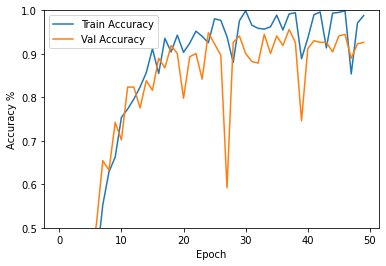

In [47]:
# plot the accuracy history
import matplotlib.pyplot as plt
def plot_history(history):
 plt.figure()
 plt.xlabel('Epoch')
 plt.ylabel('Accuracy %')
 plt.plot(history.epoch, np.array(history.history['acc']),
 label='Train Accuracy')
 plt.plot(history.epoch, np.array(history.history['val_acc']),
 label = 'Val Accuracy')
 plt.legend()
 plt.ylim([0.5, 1])
plot_history(history)